In [153]:
import math
from random import *

In [154]:
probability = 100  # Ex: for 1/100 odds, enter 100 here

# Ex: for 1/100 odds, the calculation for the midpoint looks like: .99^y = 0.5
# To find y, the calculation needs to be: log [base:0.99] (0.5) = y
# The following code makes this calulation for any probability:

base = 1 - (1/probability) # the probability of the roll being unsuccessful; necessary for the calculation
cutoff = .5 # Statistical midpoint; half of all successful rolls occur at or below this number
exponent = math.log(cutoff, base) # Number of rolls needed to reach midpoint

print(round(exponent))

69


In [161]:
batch = 1000000 # total number of rolls used to test the theory

n = 1 # roll number
successList = []
for x in range(1, batch):
    target = randint(1, probability)
    roll = randint(1, probability)

    if roll == target:
        successList.append(n)
        n = 1
    else:
        n += 1

In [162]:
total = 0
half = 0
for x in successList:
    total += x
    if x <= exponent: # exponent indicates the number of rolls to reach the midpoint -- where half of all rolls reside below, and half above
        half += 1

print(f"Percentage of successful rolls occuring before or at the halfway point (~{round(exponent)} rolls for 1 in {probability} odds):")
print(half/len(successList))

Percentage of successful rolls occuring before or at the halfway point (~69 rolls for 1 in 100 odds):
0.494889157035013


In [168]:
print(f"Fewest attempts required for successful roll: \n{min(successList)}\n")
print(f"Greatest number of attempts until successful roll: \n{max(successList)}")

Fewest attempts required for successful roll: 
1

Greatest number of attempts until successful roll: 
1047


In [164]:
frequency = []
for i in successList:
    frequency.append((i, successList.count(i)))

frequency = set(frequency)
y = 1
for x in frequency:
    # if x[1] > 1:
    #     print(x)
    if x[1] > y:
        y = x[1]
        
for x in frequency:
    if x[1] == y:
        print(f"Most frequent successful roll + frequency: \n{x}")

Most frequent successful roll + frequency: 
(3, 1034)


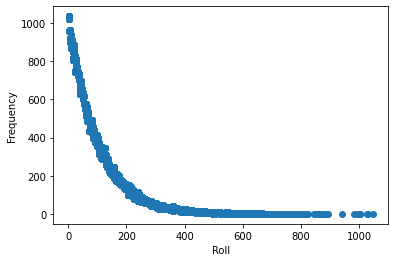

In [165]:
import matplotlib.pyplot as plt
import numpy as np

roll = []
freq = []
for i in successList:
    roll.append(i)
    freq.append(successList.count(i))
plt.scatter(roll, freq)
plt.xlabel("Roll")
plt.ylabel("Frequency")
plt.show()